In [12]:
from SeismicReduction import *

### 1. Load data - Update paths to the data locations!

In [18]:
set_seed(42) # set seed to standardise results
dataholder = DataHolder("Glitne", [1300, 1502, 2], [1500, 2002, 2])
dataholder.add_near('../data/3d_nearstack.sgy');
dataholder.add_far('../data/3d_farstack.sgy');
dataholder.add_horizon('../data/Top_Heimdal_subset.txt')

SegyPY0.57:  readSegy : Trying to read ../data/3d_nearstack.sgy
SegyPY0.57:  getSegyHeader : succesfully read ../data/3d_nearstack.sgy
SegyPY0.57:  filesize=31438840
SegyPY0.57:  bps=    4
SegyPY0.57:  nd=7858810
SegyPY0.57:  readSegyData : Reading segy data
SegyPY0.57:  readSegyData : SEG-Y revision = 0
SegyPY0.57:  readSegyData : DataSampleFormat=1(IBM Float)
SegyPY0.57:   ns=250
SegyPY0.57:  readSegyData : Finished reading segy data
SegyPY0.57:  readSegy : Trying to read ../data/3d_farstack.sgy
SegyPY0.57:  getSegyHeader : succesfully read ../data/3d_farstack.sgy
SegyPY0.57:  filesize=31438840
SegyPY0.57:  bps=    4
SegyPY0.57:  nd=7858810
SegyPY0.57:  readSegyData : Reading segy data
SegyPY0.57:  readSegyData : SEG-Y revision = 0
SegyPY0.57:  readSegyData : DataSampleFormat=1(IBM Float)
SegyPY0.57:   ns=250
SegyPY0.57:  readSegyData : Finished reading segy data


### 2. Create processor and initialise a model input

In [20]:
### Processor
processor = Processor(dataholder)
processed_data = processor(flatten=[True, 12, 52], crop=[False, 120, 200], normalise=True)

Processor has created an output with shape:  (25351, 2, 64)


### 3. Run on the selection of models with .reduce() and .to_2d()

In [31]:
## PCA
pca = PcaModel(processed_data)
pca.reduce(2)
pca.to_2d()

ModelAgent initialised
NOTE: embedding already reduced to 2D latent space, UMAP will not be run


In [22]:
## UMAP
umap = UmapModel(processed_data)
umap.reduce(umap_neighbours=50, umap_dist=0.01)

ModelAgent initialised

2D UMAP representation of UMAP embedding initialised:
	Input dimension: (25351, 128)
	2-D UMAP representation complete



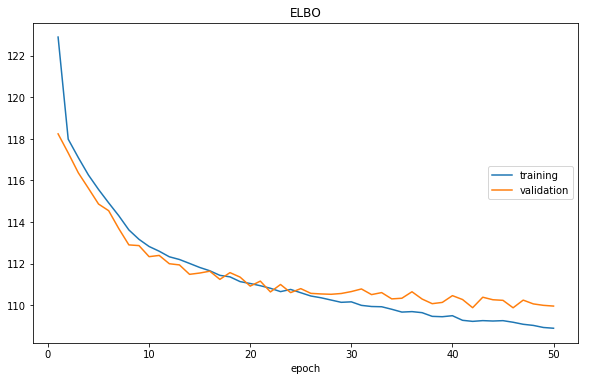

ELBO:
training   (min:  108.893, max:  122.891, cur:  108.893)
validation (min:  109.877, max:  118.237, cur:  109.958)
NOTE: embedding already reduced to 2D latent space, UMAP will not be run


In [24]:
## vae
vae = VaeModel(processed_data)
vae.reduce(epochs=50, hidden_size=2, lr=0.0005, plot_loss=True)
vae.to_2d()


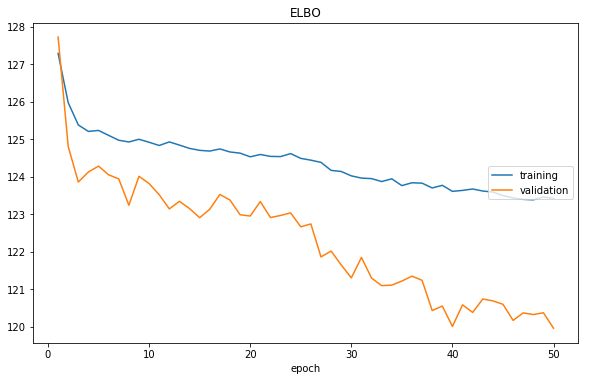

ELBO:
training   (min:  123.382, max:  127.289, cur:  123.424)
validation (min:  119.955, max:  127.725, cur:  119.955)
NOTE: embedding already reduced to 2D latent space, UMAP will not be run


In [25]:
## bvae
bvae = BVaeModel(processed_data)
bvae.reduce(epochs=50, hidden_size=2, lr=0.0005, beta=7, plot_loss=True)
bvae.to_2d()

## 4. Visualisation:

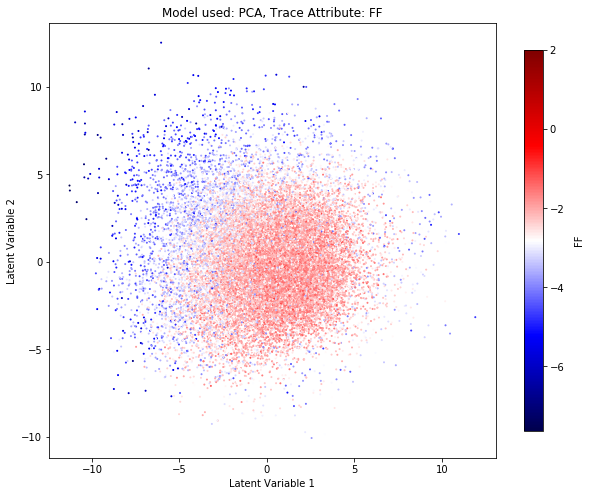

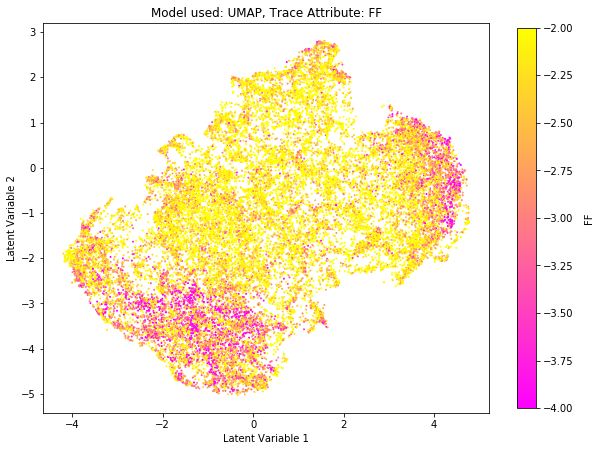

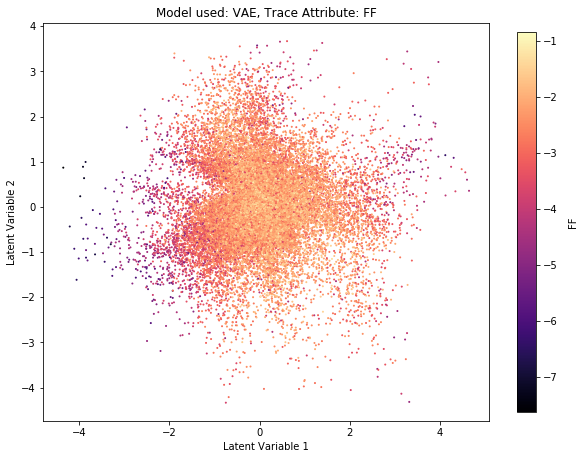

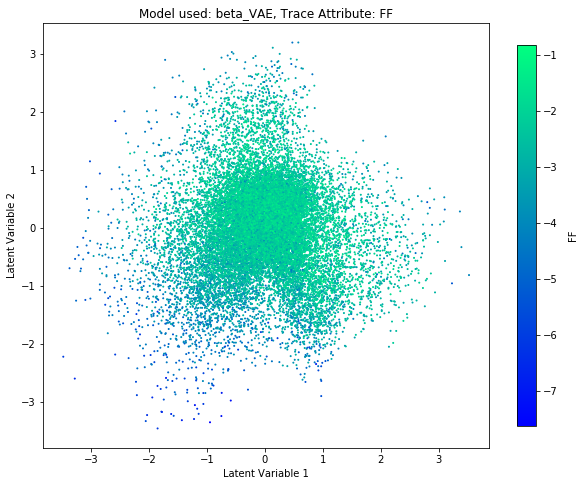

In [53]:
plot_agent(pca, attr='FF', cmap='seismic', vmax=2, save_path=False)
plot_agent(umap, attr='FF', cmap='spring', vmin=-4, vmax= -2, save_path=False)
plot_agent(vae, attr='FF', cmap='magma' ,save_path=False)
plot_agent(bvae, attr='FF', cmap='winter',save_path=False)


## Model Save\Load:

In [54]:
vae.save_nn('./mymodel')

In [55]:
# create a NEW VaeModel objecta and initialise with the data
loadedNN = VaeModel(processed_data)
# load the trained neural network into the object
loadedNN.load_nn('./mymodel')

ModelAgent initialised


In [56]:
# run the model analysis
loadedNN.reduce() # no need for parmaters as model is already trained
loadedNN.to_2d()

NOTE: embedding already reduced to 2D latent space, UMAP will not be run


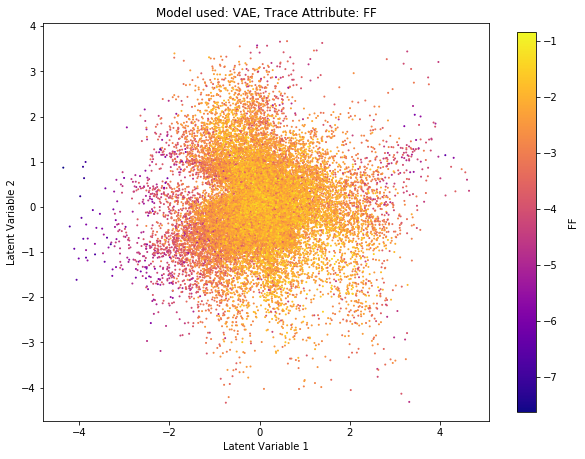

In [57]:
# visualise the result!
plot_agent(loadedNN)